## Question 1 

### How many matches ended in “tie” and played “super-over”?  

In [99]:
# importing libraries and data
import pandas as pd
import matplotlib.pyplot as plt

matches = pd.read_csv("./matches.csv")
deliveries = pd.read_csv('./deliveries.csv')

matches.loc[matches['player_of_match'].isna()]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match_tie = matches.loc[matches['result'] == 'tie']['id']
match_tie

33      34
125    126
189    190
387    388
400    401
475    476
535    536
Name: id, dtype: int64

In [5]:
# deliveries['match_id'].value_counts()

super_over = deliveries.loc[deliveries['is_super_over'] == 1].groupby(by ='match_id', as_index=False).count()['match_id']
# super_over['math'] = 

super_over.loc[super_over == match_tie.values].count()


7

## Question 2 

### Which team had won by maximum runs? For this match, list the venue, date, player of the match, city, and season? ['venue', 'date', 'player_of_match', 'city', 'season']

In [6]:
matches.loc[matches['win_by_runs'] == max(matches['win_by_runs'])][['winner', 'venue', 'date', 'player_of_match', 'city', 'season']]


,winner,venue,date,player_of_match,city,season
43,Mumbai Indians,Feroz Shah Kotla,2017-05-06,LMP Simmons,Delhi,2017


## Question 3 

### How many toss-winning teams have chosen to field and won the matches? What is the percentage of it? Use a suitable graph to show the result visually.  

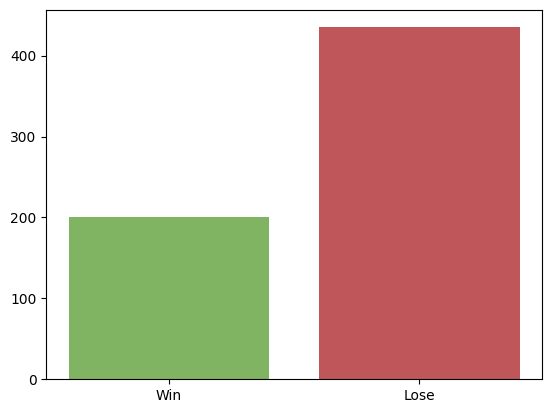

In [7]:
toss_win_teams_count = len(matches.loc[(matches['toss_decision'] == 'field') & (matches['toss_winner'] == matches['winner'])])
toss_win_teams_count #/ len(matches) * 100


x = ['Win', 'Lose']
y = [toss_win_teams_count, len(matches)-toss_win_teams_count]

plt.bar(x, y, color = ['#80B362', '#BF565A'])
# plt.plot(data = x, kind = 'bar')
# plt.plot(data = y, kind = 'bar')
# plt.xlabel(x[0])
# plt.legend()
plt.show()

## Question 4 

### Which toss-winning team had played maximum dot balls? What is the match number? Against which team this match was played?  

In [8]:
dot_balls = deliveries.loc[(deliveries['total_runs'] == 0) & (deliveries['player_dismissed'].isna())]
max_dot_balls = dot_balls.groupby(['match_id', 'bowling_team'], as_index= False).count()
max_dot_balls =max_dot_balls.loc[max_dot_balls['inning'] == max(max_dot_balls['inning'])][['match_id', 'bowling_team']]
max_dot_balls

,match_id,bowling_team
136,69,Kings XI Punjab


## Question 5 

### Which team had won by maximum wicket, by applying the condition “player of the match is a batsman”? 

In [9]:
player_of_match = matches.loc[matches['win_by_wickets'] == max(matches['win_by_wickets'])][['id', 'winner', 'player_of_match']]
# player_of_match = player_of_match.set_index('id')
player_of_match

,id,winner,player_of_match
2,3,Kolkata Knight Riders,CA Lynn
34,35,Kings XI Punjab,Sandeep Sharma
71,72,Deccan Chargers,AC Gilchrist
119,120,Delhi Daredevils,DL Vettori
183,184,Royal Challengers Bangalore,JH Kallis
298,299,Rajasthan Royals,SR Watson
376,377,Mumbai Indians,DR Smith
390,391,Chennai Super Kings,MEK Hussey
542,543,Royal Challengers Bangalore,VR Aaron
590,591,Sunrisers Hyderabad,B Kumar


In [10]:
batsman = deliveries.groupby(['match_id', 'batting_team', 'batsman'], as_index = False).count()
batsman.loc[batsman['match_id'].isin(player_of_match['id']) & 
            (batsman['batsman'].isin(player_of_match['player_of_match'])) & 
            (batsman['batting_team'].isin(player_of_match['winner']))][['batsman', 'match_id', 'batting_team']].set_index('match_id')


,batsman,batting_team
match_id,,
3,CA Lynn,Kolkata Knight Riders
72,AC Gilchrist,Deccan Chargers
184,JH Kallis,Royal Challengers Bangalore
299,SR Watson,Rajasthan Royals
377,DR Smith,Mumbai Indians
377,SR Watson,Rajasthan Royals
391,MEK Hussey,Chennai Super Kings
391,AC Gilchrist,Kings XI Punjab


## Question 6 

### Which player has received the maximum player of the match awards? Also, show the graphical view taking the franchise into consideration. (Hint: Franchise here means that the player representing the X team in taking all seasons into consideration)  .

In [11]:
top_player = matches.groupby('player_of_match', as_index = True).agg({'player_of_match': 'count'})
top_player.loc[top_player['player_of_match'] == max(top_player['player_of_match'])]

,player_of_match
player_of_match,
CH Gayle,18


Text(0.5, 1.0, 'Player of match by Team')

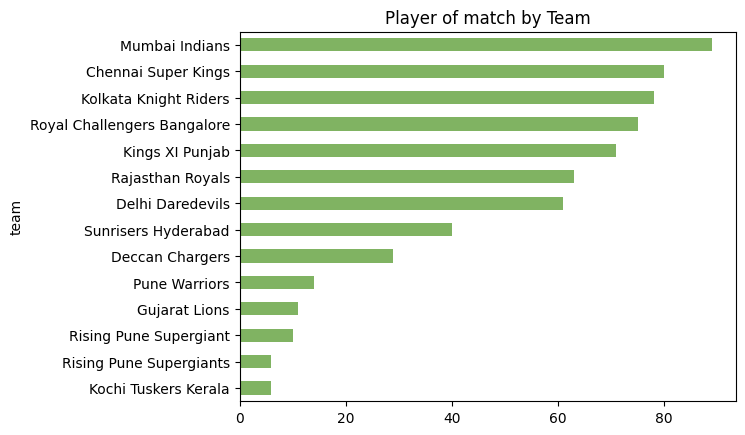

In [98]:
merged = matches.merge(deliveries,
                left_on=['id'],
                right_on=['match_id'],
                how='inner')
merged = merged[['id', 'match_id', 'player_of_match', 'winner','batsman', 'bowler', 'non_striker', 'batting_team', 'bowling_team']]




merged = merged.loc[(merged['id'] == merged['match_id']) &
        (merged['player_of_match'] == merged['batsman']) | 
        (merged['player_of_match'] == merged['non_striker']) |
        (merged['player_of_match'] == merged['bowler'])
        ]

def get_player_of_match(row):

        if row['player_of_match'] == row['batsman'] or row['player_of_match'] == row['non_striker']:
                return row['batting_team']

        elif row['player_of_match'] == row['bowler']:
                return row['bowling_team']
        else:
                return ''

merged['team'] = merged.apply(get_player_of_match, axis = 1)

merged = merged[['team', 'id']].groupby(['id','team'], as_index= False).count()
merged = merged.groupby('team').count().sort_values(by = 'id')

merged.plot(kind = 'barh', color = '#80B362', legend= False)
plt.title('Player of match by Team')

## Question 7 

### Which team has used the maximum number of bowlers in an innings? List their bowling statistics. (Hint: Bowling statistics include bowler name, runs conceded, wickets taken, and bowling economy)  


In [132]:
max_bowler = deliveries[['match_id','bowling_team', 'bowler', 'inning']].groupby(['match_id','inning','bowling_team', 'bowler'], as_index=False).count()


max_bowler = max_bowler.groupby(['match_id','inning', 'bowling_team']).count()

max_bowler.loc[max_bowler['bowler'] == max(max_bowler['bowler'])]
# max_bowler
# deliveries.loc[(deliveries['match_id'] == 620) & (deliveries['inning'] == 2)]['bowler'].value_counts()

,,,bowler
match_id,inning,bowling_team,
620,2,Royal Challengers Bangalore,9


#### Statistics of bowlers

Text(0.5, 0, '')

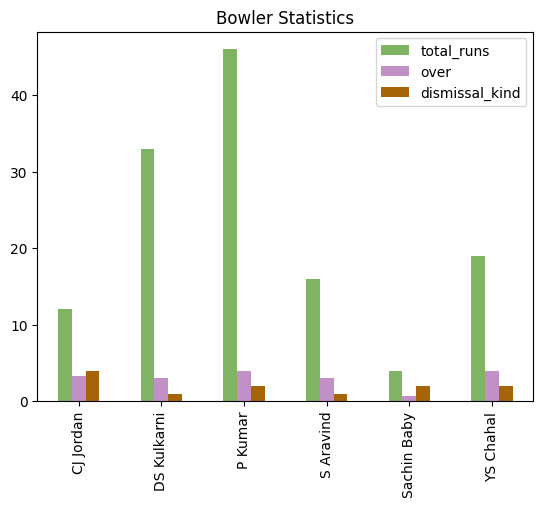

In [188]:
# Bowling statistics include bowler name, runs conceded, wickets taken, and bowling economy

statistics_all = deliveries.loc[deliveries['match_id'] == 620][['bowler', 'total_runs', 'dismissal_kind', 'over']]

statistics = statistics_all[['bowler', 'total_runs','over']].groupby('bowler').agg({'total_runs': 'sum','over': 'count'})
statistics['over'] = statistics['over'] / 6

# statistics
statistics_wickets = statistics_all[['bowler', 'dismissal_kind']].loc[
            (deliveries['dismissal_kind'] == 'caught') | 
            (deliveries['dismissal_kind'] == 'bowled') |
            (deliveries['dismissal_kind'] == 'caught and bowled') |
            (deliveries['dismissal_kind'] == 'stumped') |
            (deliveries['dismissal_kind'] == 'hit wicket') 
            ]

statistics_wickets = statistics_wickets.groupby('bowler').agg({'dismissal_kind': 'count'})

statistics = statistics.merge(statistics_wickets, left_index=True, right_index=True)
statistics.plot(kind= 'bar', color = ['#80B362','#C190C6', '#A66408'], legend= True)
plt.title('Bowler Statistics')
plt.xlabel("")

## Question 8 

### Which teams had won the “super-over” battle while batting first? For these matches, find the season and Player of the Match. 

In [14]:
matches.loc[(matches['toss_decision'] == 'bat') & (matches['toss_winner'] == matches['winner']) & (matches['result'] == 'tie')]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN


## Question 9 

### Considering all seasons, find the highest score in IPL. Show the score distribution using a suitable graph.  

Text(0.5, 1.0, 'Total Runs by Batting Team')

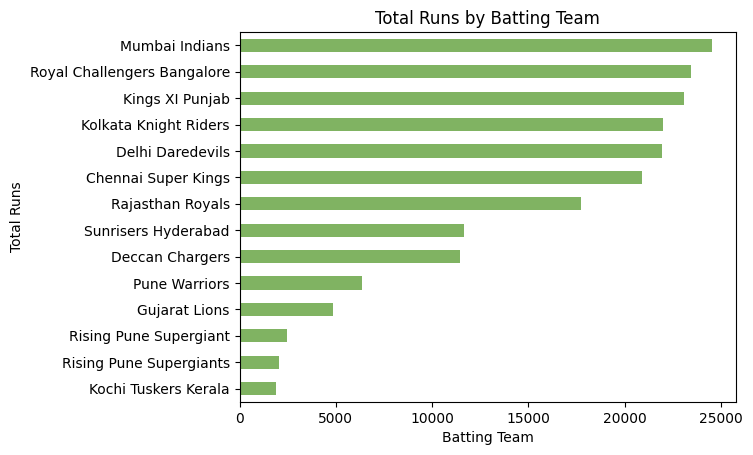

In [189]:
highest_score =deliveries[['batting_team', 'total_runs']].groupby(['batting_team'], as_index=False).sum('total_runs').sort_values(by='total_runs')

highest_score.plot(kind='barh', x='batting_team', y='total_runs', color = '#80B362', legend= False)
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.title('Total Runs by Batting Team')

## Question 10 

### Which IPL Team is most successful? The most successful team is the one who has one the greatest number of matches, considering all seasons. Also, interpret the result with the help of plots/graphs.  


<Axes: xlabel='Winning Teams'>

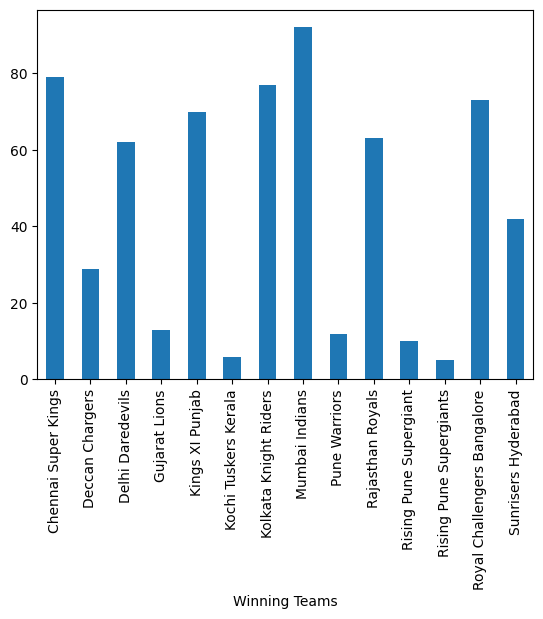

In [215]:
successful_team = matches.loc[matches['result'] != 'no result'] 


successful_team =successful_team.groupby('winner').agg({'winner': 'count'}).rename_axis(mapper = 'Winning Teams', axis= 'index')

successful_team.plot(kind='bar', legend= False)